**BINARY CLASSIFICATION OF HUMAN BLOOD CELLS TO DETECT INFECTION WITH MALARIA PARASITE OR OTHERWISE USING CONVOLUTIONAL NEURAL NETWORK (VGG19) AND VISION TRANSFOMER(ViT)**

Malaria is a life-threatening disease caused by parasites that are transmitted to people through the bites of infected female Anopheles mosquitoes.
It is preventable and curable.
In 2018, there were an estimated 228 million cases of malaria worldwide.
The estimated number of malaria deaths stood at 405 000 in 2018.
Children aged under 5 years are the most vulnerable group affected by malaria;
in 2018, they accounted for 67% (272 000) of all malaria deaths worldwide.
The WHO African Region carries a disproportionately high share of the global malaria burden.
In 2018, the region was home to 93% of malaria cases and 94% of malaria deaths.

The WHO African Region continues to carry a disproportionately high share of the global malaria burden. In 2023 the Region was home to about 94% of all malaria cases and 95% of deaths. Children under 5 years of age accounted for about 76% of all malaria deaths in the Region.

Over half of these deaths occurred in four countries: Nigeria (30.9%), the Democratic Republic of the Congo (11.3%), Niger (5.9%) and United Republic of Tanzania (4.3%).

This project focuses on the use of Artificial Intelligence, specifically Computer Vision to create a model that helps to detect malaria parasites in the human body by classifying the blood cells as 'Parasite_infected' or 'uninfected'. This model further underscores the merits that AI brings into the health sector; helping to reduce timetaken to detect malaria. Thus aiding faster treatment and reducing the number of death due to malaria.


**IMPORTING LIBRARIES**

In [ ]:
import kagglehub

dataset_path = kagglehub.dataset_download('meetnagadia/malaria-dataset')

print('Data source import complete.')

Data source import complete.


In [ ]:
!ls /kaggle/input/malaria-dataset/Dataset

Test  Train


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing import image
import numpy as np
import os

In [ ]:
dataset_path = "/kaggle/input/malaria-dataset/Dataset"

# Adjust the directory paths based on the structure of the plant seedling dataset
train_dir = os.path.join(dataset_path, "Train")
test_dir  = os.path.join(dataset_path, "Test")

image_size = (224, 224)  # adjust if needed
batch_size = 32

In [ ]:


# Load training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    image_size=image_size,
    batch_size=batch_size,
     shuffle=True,
    label_mode ='categorical'
)

# Load test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=image_size,
    batch_size=batch_size,
      shuffle=False,
    label_mode ='categorical'
)


Found 416 files belonging to 2 classes.
Found 134 files belonging to 2 classes.


Classes: ['Parasite', 'Uninfected']


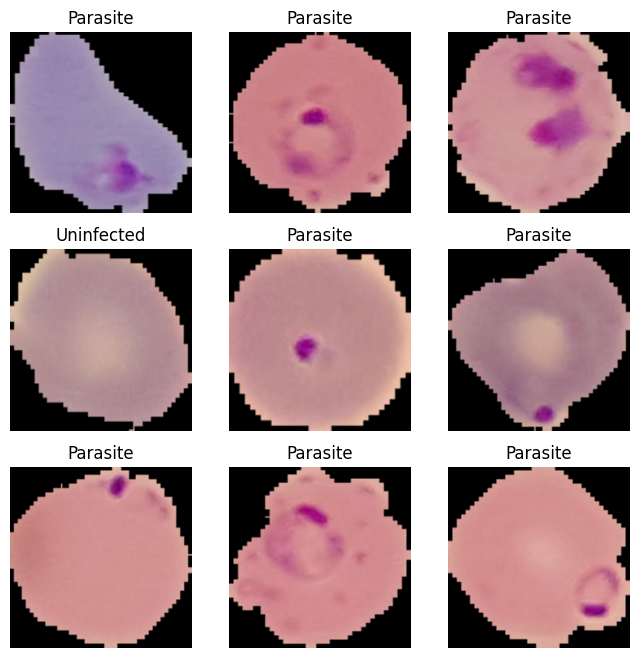

In [ ]:
import matplotlib.pyplot as plt

class_names = train_ds.class_names
print("Classes:", class_names)

# Show a 3x3 grid from the first batch
for images, labels in train_ds.take(1):
    plt.figure(figsize=(8,8))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        # Get the class index from the categorical label
        class_index = tf.argmax(labels[i]).numpy()
        plt.title(class_names[class_index])
        plt.axis("off")
    plt.show()

**DATA AUGMENTATION**

In [ ]:
# Data augmentation for the training dataset
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

**DATA PROCESSING**

In [ ]:
# Preprocess and augment the training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 416 images belonging to 2 classes.


In [ ]:
# Preprocess the test
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 134 images belonging to 2 classes.


**CREATE A CNN MODEL USING VGG19**

In [ ]:
base_model = VGG19(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(2, activation='softmax')(x)

model = Model(base_model.input, x)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             

 Total params: 32,870,978 (125.39 MB)

 Trainable params: 12,846,594 (49.01 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

**COMPILE & TRAIN MODEL**

In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,validation_data= test_generator,validation_steps=len(test_generator), epochs=35)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 803ms/step - accuracy: 0.4946 - loss: 5.8356 - val_accuracy: 0.3209 - val_loss: 3.5737
Epoch 2/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 581ms/step - accuracy: 0.5779 - loss: 2.6798 - val_accuracy: 0.7239 - val_loss: 0.5318
Epoch 3/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 645ms/step - accuracy: 0.6793 - loss: 1.0661 - val_accuracy: 0.6940 - val_loss: 0.5452
Epoch 4/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 561ms/step - accuracy: 0.6779 - loss: 0.8239 - val_accuracy: 0.7687 - val_loss: 0.5076
Epoch 5/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 548ms/step - accuracy: 0.7042 - loss: 0.6220 - val_accuracy: 0.7090 - val_loss: 0.5647
Epoch 6/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 645ms/step - accuracy: 0.6716 - loss: 0.5824 - val_accuracy: 0.6866 - val_loss: 0.5241
Epoch 7/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 574ms/step - accuracy: 0.6771 - loss: 0.6470 - val_accuracy: 0.7090 - val_loss: 0.5481
Epoch 8/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 559ms/step - accuracy: 0.7389 - loss: 0.4968 - val_accuracy:

In [ ]:
train_generator.class_indices

{'Parasite': 0, 'Uninfected': 1}

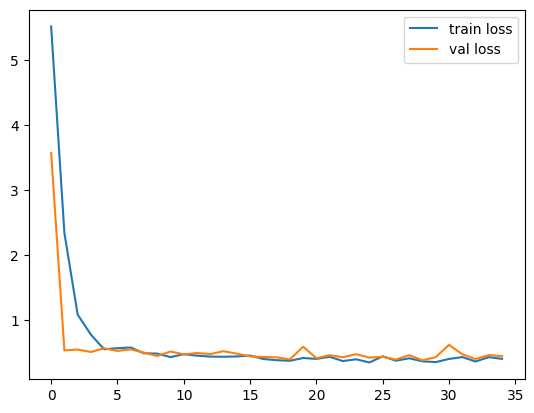

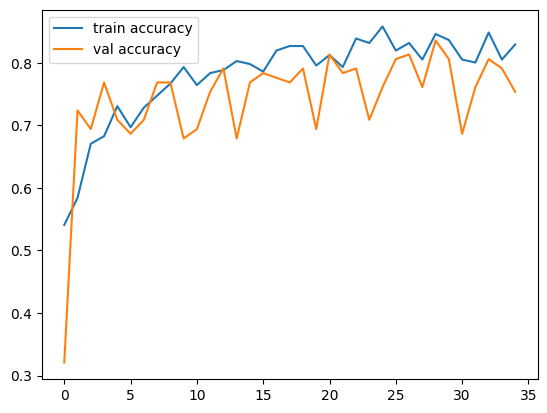

<Figure size 640x480 with 0 Axes>

In [ ]:
#plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('Lossval_loss')

#plot the accuracy
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.legend()
plt.show()
plt.savefig('Accuracy')

**EVALUATE & SAVE THE MODEL**

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 0.7300 - loss: 0.4757
Test accuracy: 75.37%


In [ ]:
# Save the model
model.save('/content/sample_data/cnn_model.h5')

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image  # ok on Kaggle

# Create reverse mapping {0: 'Parasite', 1: 'Uninfected'}
labels = {v: k for k, v in train_generator.class_indices.items()}

def predict_image(model, image_path, target_size=image_size):
    """
    Predicts class of a given image.

    Args:
        model: trained keras model
        img_path: path to image file
        target_size: size to resize the image (should match training size)

    Returns:
        predicted_class (str), confidence (float)
    """
    # Load and preprocess image
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0  # normalize like training
    img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

    # Get prediction
    preds = model.predict(img_array)
    pred_class_idx = np.argmax(preds, axis=1)[0]
    confidence = preds[0][pred_class_idx]

    return labels[pred_class_idx], confidence


In [ ]:
image_path = '/kaggle/input/malaria-dataset/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_19.png'

predicted_class, confidence = predict_image(model, image_path)
print(f"Prediction: {predicted_class} ({confidence*100:.2f}%)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step
Prediction: Parasite (52.91%)


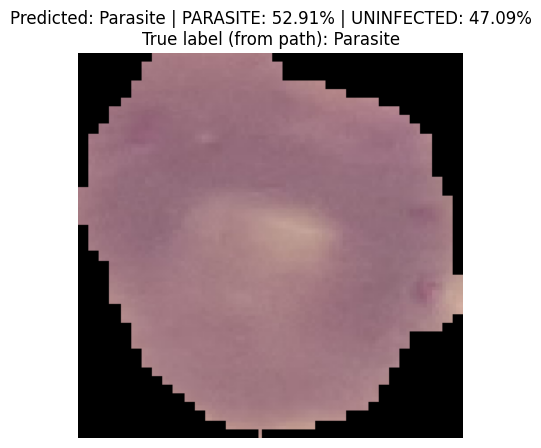

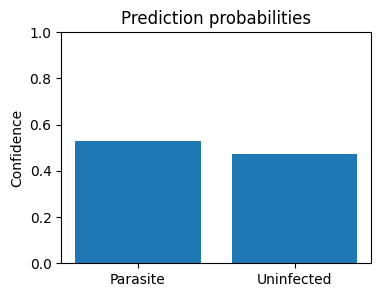

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# --- load image ---
pil_img = image.load_img(image_path, target_size=image_size)  # RGB by default
img_arr = image.img_to_array(pil_img)                         # [H,W,3], 0..255
img_disp = img_arr.astype("uint8")                            # for plotting

# --- preprocess ---
x = np.expand_dims(img_arr, axis=0).astype("float32")
x = x / 255.0  # remove if your model already rescales

# --- predict ---
pred = model.predict(x, verbose=0)[0]

# Handle binary (sigmoid) vs softmax(2)
if model.output_shape[-1] == 1:        # sigmoid
    prob_parasite = float(pred.squeeze())
    prob_uninfected = 1.0 - prob_parasite
    pred_label = class_names[int(prob_parasite >= 0.5)]
else:                                   # softmax
    prob_uninfected = float(pred[1])
    prob_parasite = float(pred[0])
    pred_label = class_names[np.argmax(pred)]

true_label = os.path.basename(os.path.dirname(image_path))

# --- show image with prediction ---
plt.figure(figsize=(5,5))
plt.imshow(img_disp.astype("uint8"))
plt.axis('off')
plt.title(
    f"Predicted: {pred_label} | PARASITE: {prob_parasite:.2%} | UNINFECTED: {prob_uninfected:.2%}\n"
    f"True label (from path): {true_label}"
)
plt.show()

# --- probability bar chart ---
plt.figure(figsize=(4,3))
plt.bar(class_names, [prob_parasite, prob_uninfected])
plt.ylim(0, 1)
plt.title("Prediction probabilities")
plt.ylabel("Confidence")
plt.show()


****CREATING A MODEL USING VISION TRANSFORMER (ViT)****

In [ ]:
#installing dependencies and import library
!pip install -q transformers torch torchvision

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from transformers import ViTForImageClassification, ViTImageProcessor
import matplotlib.pyplot as plt




**DATA PREPROCESSING**

In [ ]:
dataset_path = "/kaggle/input/malaria-dataset/Dataset"

# Adjust the directory paths based on the structure of the plant seedling dataset
train_dir = os.path.join(dataset_path, "Train")
test_dir  = os.path.join(dataset_path, "Test")


# Image transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load train & test dataset (adjust paths to your dataset location)
train_data = datasets.ImageFolder(train_dir, transform=transform)
test_data  = datasets.ImageFolder(test_dir,  transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=32)

print("Classes:", train_data.classes)   # should show ['Parasite', 'Uninfected']


Classes: ['Parasite', 'Uninfected']


**LOAD PRETRAINED ViT**

In [ ]:
# Load processor & model
#Load pretrained ViT and finetune it for 2 classes
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

model2 = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224-in21k",
    num_labels=2   # Parasite vs Uninfected
)




Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2.to(device)

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (intermed

**TRAINING SET-UP**

In [ ]:
optimizer = torch.optim.AdamW(model2.parameters(), lr=2e-5)
loss_fn = torch.nn.CrossEntropyLoss()


**TRAINING LOOP**

In [ ]:
epochs =10 # try small first, increase later

for epoch in range(epochs):
    model2.train()
    total_loss, correct = 0, 0

    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)

        # Convert images to ViT inputs
        inputs = processor(imgs, return_tensors="pt").to(device)

        outputs = model2(**inputs, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        correct += (logits.argmax(1) == labels).sum().item()

    acc = correct / len(train_data)
    print(f"Epoch {epoch+1}: Loss = {total_loss:.4f}, Accuracy = {acc:.4f}")

Epoch 1: Loss = 9.0267, Accuracy = 0.5288
Epoch 2: Loss = 9.0208, Accuracy = 0.5288
Epoch 3: Loss = 8.9979, Accuracy = 0.5288
Epoch 4: Loss = 8.9985, Accuracy = 0.5288
Epoch 5: Loss = 9.0066, Accuracy = 0.5288
Epoch 6: Loss = 8.9887, Accuracy = 0.5288
Epoch 7: Loss = 8.9901, Accuracy = 0.5288
Epoch 8: Loss = 8.9946, Accuracy = 0.5288
Epoch 9: Loss = 8.9977, Accuracy = 0.5288
Epoch 10: Loss = 9.0170, Accuracy = 0.5288


**EVALUATE THE TEST DATA**

In [161]:
model2.eval()
correct = 0

with torch.no_grad():
    for imgs, labels in test_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        inputs = processor(imgs, return_tensors="pt").to(device)

        outputs = model2(**inputs)
        preds = outputs.logits.argmax(1)
        correct += (preds == labels).sum().item()

print(f"Test Accuracy: {correct / len(test_data):.4f}")


Test Accuracy: 0.6791


**PREDICT A SINGLE IMAGE**

In [163]:
from PIL import Image

img_path = '/kaggle/input/malaria-dataset/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_19.png'
image = Image.open(img_path).convert("RGB")

inputs = processor(images=image, return_tensors="pt").to(device)
outputs = model2(**inputs)
pred = outputs.logits.argmax(1).item()

print("Prediction:", train_data.classes[pred])


Prediction: Uninfected


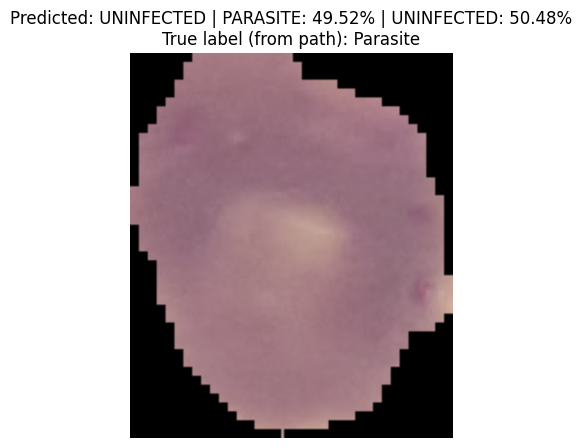

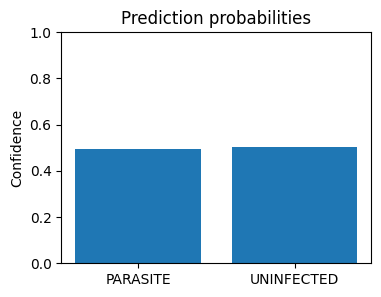

In [164]:
from PIL import Image
import numpy as np
import torch
import matplotlib.pyplot as plt
import os

# --- load image ---
pil_img = Image.open(image_path).convert('RGB')  # open as RGB
img_arr = np.array(pil_img)                      # [H,W,3], 0..255
img_disp = img_arr.astype("uint8")               # for plotting

# --- preprocess with ViT processor ---
inputs = processor(images=pil_img, return_tensors="pt").to(device)

with torch.no_grad():
    outputs = model2(**inputs)
    probs = torch.softmax(outputs.logits, dim=1)[0]
    pred = outputs.logits.argmax(1).item()

# --- extract probabilities ---
prob_parasite = float(probs[0])     # class 0 = PARASITE
prob_uninfected = float(probs[1])   # class 1 = UNINFECTED

# --- predicted label ---
class_names = ["PARASITE", "UNINFECTED"]
pred_label = class_names[pred]
true_label = os.path.basename(os.path.dirname(image_path))

# --- show image with prediction ---
plt.figure(figsize=(5,5))
plt.imshow(img_disp)
plt.axis('off')
plt.title(
    f"Predicted: {pred_label} | PARASITE: {prob_parasite:.2%} | UNINFECTED: {prob_uninfected:.2%}\n"
    f"True label (from path): {true_label}"
)
plt.show()

# (optional) probability bar chart
plt.figure(figsize=(4,3))
plt.bar(class_names, [prob_parasite, prob_uninfected])
plt.ylim(0, 1)
plt.title("Prediction probabilities")
plt.ylabel("Confidence")
plt.show()


**MODEL EVALUATION: VGG19 VERSUS ViG**

**EVALUATING VGG19**

In [165]:
# Evaluate on test set
vgg19_loss, vgg19_acc = model.evaluate(test_ds, verbose=1)

# Predict probabilities
vgg19_preds = model.predict(test_ds, verbose=1)
if vgg19_preds.shape[1] == 1:
    vgg19_preds_labels = (vgg19_preds.ravel() >= 0.5).astype(int)
else:
    vgg19_preds_labels = np.argmax(vgg19_preds, axis=1)

# True labels
true_labels = np.concatenate([y for x, y in test_ds], axis=0)
true_labels = np.argmax(true_labels, axis=1) if true_labels.ndim > 1 else true_labels


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 0.8307 - loss: 15.0790


4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 424ms/step


**EVALUATING ViT**

In [166]:
from tqdm import tqdm
import torch

vig_preds_labels = []
vig_probs = []

for batch in test_ds:
    images, labels = batch
    for i in range(images.shape[0]):
        pil_img = tf.keras.preprocessing.image.array_to_img(images[i].numpy())
        inputs = processor(images=pil_img, return_tensors="pt").to(device)

        with torch.no_grad():
            outputs = model2(**inputs)
            probs = torch.softmax(outputs.logits, dim=1)[0].cpu().numpy()

        vig_probs.append(probs)
        vig_preds_labels.append(np.argmax(probs))

vig_preds_labels = np.array(vig_preds_labels)
vig_probs = np.array(vig_probs)


**COMPARE METRICS**

In [167]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("📊 VGG19 Results")
print(classification_report(true_labels, vgg19_preds_labels, target_names=class_names))
print(confusion_matrix(true_labels, vgg19_preds_labels))

print("\n📊 ViG Results")
print(classification_report(true_labels, vig_preds_labels, target_names=class_names))
print(confusion_matrix(true_labels, vig_preds_labels))


📊 VGG19 Results
              precision    recall  f1-score   support

    PARASITE       0.68      0.99      0.80        91
  UNINFECTED       0.00      0.00      0.00        43

    accuracy                           0.67       134
   macro avg       0.34      0.49      0.40       134
weighted avg       0.46      0.67      0.55       134

[[90  1]
 [43  0]]

📊 ViG Results
              precision    recall  f1-score   support

    PARASITE       0.92      0.89      0.91        91
  UNINFECTED       0.78      0.84      0.81        43

    accuracy                           0.87       134
   macro avg       0.85      0.86      0.86       134
weighted avg       0.88      0.87      0.87       134

[[81 10]
 [ 7 36]]


**ROC-AUC**

In [168]:
if vgg19_preds.shape[1] == 2:
    vgg19_auc = roc_auc_score(true_labels, vgg19_preds[:,1])
else:
    vgg19_auc = roc_auc_score(true_labels, vgg19_preds.ravel())

vig_auc = roc_auc_score(true_labels, vig_probs[:,1])

print(f"VGG19 AUC: {vgg19_auc:.4f}")
print(f"ViG AUC: {vig_auc:.4f}")


VGG19 AUC: 0.6637
ViG AUC: 0.9336


**VISUALIZATION**

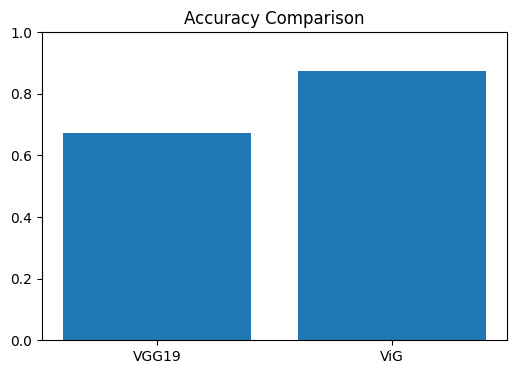

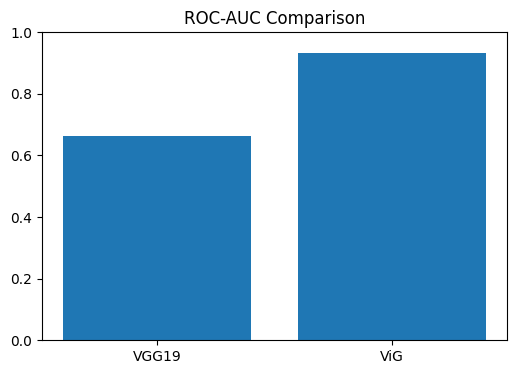

In [169]:
import matplotlib.pyplot as plt

models = ["VGG19", "ViG"]
accs = [vgg19_acc, (vig_preds_labels == true_labels).mean()]
aucs = [vgg19_auc, vig_auc]

plt.figure(figsize=(6,4))
plt.bar(models, accs)
plt.title("Accuracy Comparison")
plt.ylim(0,1)
plt.show()

plt.figure(figsize=(6,4))
plt.bar(models, aucs)
plt.title("ROC-AUC Comparison")
plt.ylim(0,1)
plt.show()
